### Weather Observations

Temperature is the one measure that seems to correlate highly with latitude, getting higher towards the equator.  Neither humidity, cloud cover, nor windspeed have much relation to latitude. All three of these regression analyses showed very weak correlations that may have been mostly a result of the geographic distribution of the cities (eg. in the southern hemisphere more cities are closer to the equator than to the pole). For the comparison of the northern to southern hemispheres, it should be noted there are more cities for the northern hemisphere in the sample set. This is indeed reflective of the population as a whole, since globally there is more land and thus more cities in the northern hemisphere.

In [1]:
import time
from citipy import citipy

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import datetime

import requests
import json
from config import ow_api_key as api_key

In [2]:
# Output File (CSV)
output_dir = "output_data"
output_data_file = f"{output_dir}/cities.csv"

### Generate random cities

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

coord_list = []
cities = []

In [4]:
# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coord_list = list(zip(lat, long))

In [5]:
# Identify nearest city for each lat, lng combination
for coord in coord_list:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)

In [6]:
len(cities)

597

### Query API for Cities

In [7]:
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='
temp = []
humidity = [] 
cloudiness = []
wind = []
city = []
latitude = []
longitude = []
country = []
date = []
record = 1
for c in cities:
    query_url = f'{base_url}{c}'
    response = requests.get(query_url).json()
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city.append(c)
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing record # {record} for {c}")
        record += 1
    except:
        print(f'{c} not found, skipping...')

    time.sleep(1)

# get time of analysis    
now = datetime.datetime.now()
today = f'{now.year}-{now.month}-{now.day}'

Processing record # 1 for kirovskiy
Processing record # 2 for tasiilaq
Processing record # 3 for waipawa
Processing record # 4 for thompson
Processing record # 5 for poum
Processing record # 6 for new norfolk
Processing record # 7 for castro
Processing record # 8 for dikson
Processing record # 9 for mandera
Processing record # 10 for upata
Processing record # 11 for kavieng
Processing record # 12 for tuktoyaktuk
Processing record # 13 for aksha
Processing record # 14 for invermere
bacuit not found, skipping...
Processing record # 15 for vaini
Processing record # 16 for busselton
Processing record # 17 for chokurdakh
Processing record # 18 for ushuaia
Processing record # 19 for balikpapan
Processing record # 20 for kapaa
Processing record # 21 for albany
Processing record # 22 for hobart
Processing record # 23 for puerto ayora
Processing record # 24 for rikitea
Processing record # 25 for viru
Processing record # 26 for tabou
Processing record # 27 for bluff
Processing record # 28 for it

Processing record # 209 for upernavik
Processing record # 210 for port shepstone
Processing record # 211 for axim
Processing record # 212 for hammerfest
grand river south east not found, skipping...
amderma not found, skipping...
Processing record # 213 for ahipara
Processing record # 214 for mehamn
Processing record # 215 for kenai
Processing record # 216 for korla
Processing record # 217 for haines junction
Processing record # 218 for itarema
Processing record # 219 for flinders
Processing record # 220 for nuuk
Processing record # 221 for bandarbeyla
Processing record # 222 for saint-paul
Processing record # 223 for rio grande
Processing record # 224 for vieste
Processing record # 225 for sitka
Processing record # 226 for lagoa
Processing record # 227 for juneau
Processing record # 228 for panacan
Processing record # 229 for raudeberg
Processing record # 230 for svetlaya
Processing record # 231 for longyearbyen
Processing record # 232 for itupiranga
Processing record # 233 for puerto

Processing record # 415 for bridgetown
Processing record # 416 for santa maria
Processing record # 417 for goderich
Processing record # 418 for augusto correa
Processing record # 419 for ramanuj ganj
Processing record # 420 for zhanakorgan
Processing record # 421 for gamba
louisbourg not found, skipping...
Processing record # 422 for lompoc
Processing record # 423 for kondapalle
Processing record # 424 for matara
Processing record # 425 for salitrillo
Processing record # 426 for caconda
Processing record # 427 for ashtian
Processing record # 428 for yala
Processing record # 429 for gejiu
Processing record # 430 for vostok
Processing record # 431 for ingham
Processing record # 432 for warrington
Processing record # 433 for angoche
Processing record # 434 for turukhansk
Processing record # 435 for oda
Processing record # 436 for kuito
Processing record # 437 for cayenne
Processing record # 438 for basco
Processing record # 439 for hurricane
Processing record # 440 for atar
Processing rec

In [8]:
weather_dict = {"city":city,
                "latitude" : latitude,
                "longitude" : longitude,
                "max temperature" : temp,
                "humidity": humidity,
                "cloudiness" : cloudiness,
                "wind speed" : wind,
                "country" : country,
                "date" : date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,city,latitude,longitude,max temperature,humidity,cloudiness,wind speed,country,date
0,kirovskiy,45.0917,133.5136,73.78,94,100,3.65,RU,1659476212
1,tasiilaq,65.6145,-37.6368,48.36,60,18,4.25,GL,1659476214
2,waipawa,-41.4122,175.5153,54.52,78,71,17.16,NZ,1659476215
3,thompson,55.7435,-97.8558,57.36,94,100,6.91,CA,1659476217
4,poum,-20.2333,164.0167,74.97,88,72,15.50,NC,1659476218


In [9]:
weather_df.describe()

,latitude,longitude,max temperature,humidity,cloudiness,wind speed,date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.00000,5.500000e+02
mean,21.173610,20.912599,70.126200,73.154545,54.705455,7.78580,1.659477e+09
std,32.725882,91.201647,13.360836,19.107016,38.874847,5.81316,2.864832e+02
min,-54.800000,-179.166700,37.060000,1.000000,0.000000,0.00000,1.659475e+09
25%,-3.750125,-58.441975,58.772500,64.000000,18.250000,3.44000,1.659476e+09
50%,25.870250,26.272500,72.340000,77.000000,59.500000,6.22000,1.659477e+09
75%,48.575975,103.503400,79.970000,87.000000,98.000000,10.36000,1.659477e+09
max,78.218600,179.316700,109.220000,100.000000,100.000000,33.31000,1.659477e+09


In [10]:
weather_df.loc[weather_df["humidity"]>100,:]

,city,latitude,longitude,max temperature,humidity,cloudiness,wind speed,country,date


In [11]:
# write cleaned data to csv
weather_df.to_csv(output_data_file,index=False)

### Scatter Plots

In [12]:
scatter_dir = f'{output_dir}/scatter_plots'

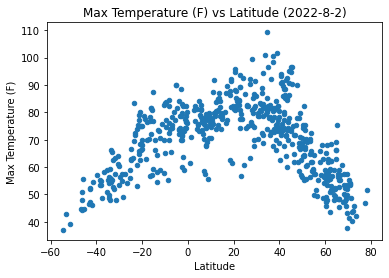

In [13]:
# Temperature (F) vs. Latitude
weather_df.plot(x="latitude",y="max temperature",kind="scatter")
plt.title(f"Max Temperature (F) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.savefig(f'{scatter_dir}/temp_v_lat.png')
plt.show()


This graph is showing temperature as a function of latitude for a random set of cities across the globe. Temperature is highest, on average, around the equator. The peak appears to lie slightly north, around 20-40 degrees. This makes sense, given that this analysis was done during the summer season for the northern hemisphere and the most direct rays of the sun are concentrated near the Tropic of Cancer (~23 degrees N latitude).

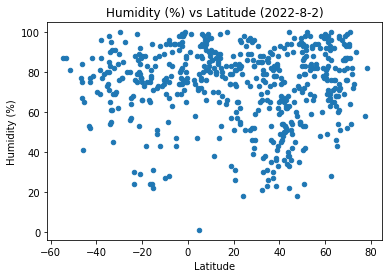

In [14]:
# Humidity (%) vs. Latitude
weather_df.plot(x="latitude",y="humidity",kind="scatter")
plt.title(f"Humidity (%) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.savefig(f'{scatter_dir}/hum_v_lat.png')
plt.show()

This graph explores the connection between percent humidity and latitude for a random set of cities across the globe. There does not appear to be any correlation between latitude and humidity, though interestingly, the places with the loweest humidity are concentrated near the equator.

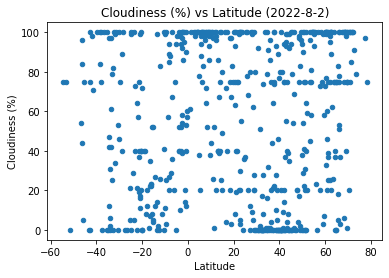

In [15]:
# Cloudiness (%) vs. Latitude
weather_df.plot(x="latitude",y="cloudiness",kind="scatter")
plt.title(f"Cloudiness (%) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.savefig(f'{scatter_dir}/cloud_v_lat.png')
plt.show()

This graph explores the connection between percent cloud cover and latitude for a random set of cities across the globe. The percent of cloud cover does not appear to be correlated with latitude at all.

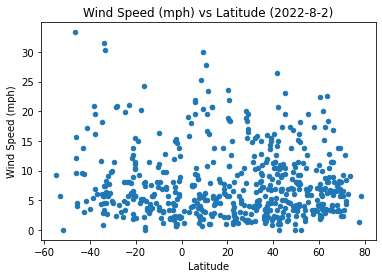

In [16]:
# Wind Speed (mph) vs. Latitude
weather_df.plot(x="latitude",y="wind speed",kind="scatter")
plt.title(f"Wind Speed (mph) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'{scatter_dir}/wind_v_lat.png')
plt.show()

This graph explores the connection between wind speed and latitude for a random set of cities across the globe. There does not appear to be a correlation between latitude and wind speed. Most cities across the globe have wind speeds between 0 and 20 miles per hour, with only a small number of cities exceeding that.

### Linear Regression

In [17]:
lin_dir = f'{output_dir}/linear_regression_plots'

In [18]:
# separate data into norther and southern hemispheres
nh_weather_df = weather_df.loc[weather_df["latitude"]>0,:]
sh_weather_df = weather_df.loc[weather_df["latitude"]<0,:]

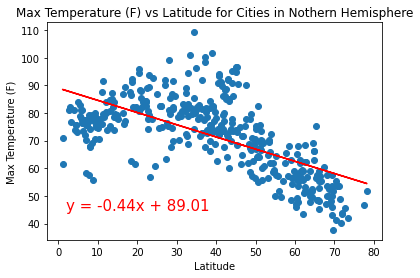

In [19]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["max temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature (F) vs Latitude for Cities in Nothern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(2,45),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_temp_v_lat.png')
plt.show()

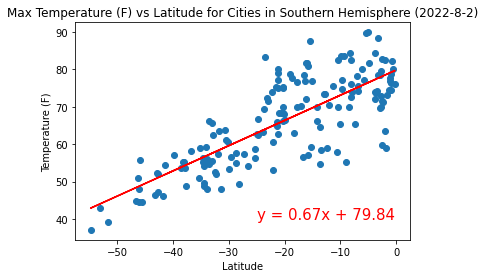

In [27]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["max temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Max Temperature (F) vs Latitude for Cities in Southern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_temp_v_lat.png')
plt.show()

#### Temperature versus Latitude
These linear regressions are showing a positive correlation between temperature and latitude for the southern hemisphere and a negative correlation for the northern hemisphere. This makes sense, since the lattitudes in the southern hemisphere increase in numeric value as you approach the equator (and so does the temperature) whereas in the northern hemisphere, latitude values decrease as you approach the equator while temperature increases.

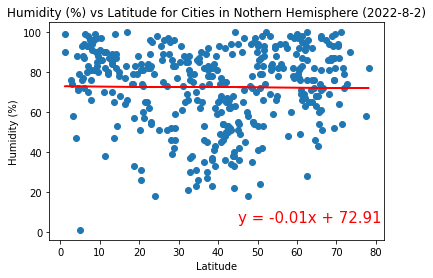

In [21]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Humidity (%) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_humidity_v_lat.png')
plt.show()

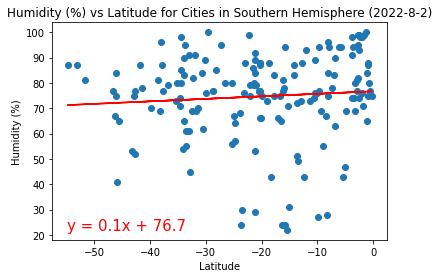

In [29]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Humidity (%) vs Latitude for Cities in Southern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_humidity_v_lat.png')
plt.show()

#### Humidity versus Latitude
These regressions show a very weak negative correlation between humidity and latitude for the northern hemisphere and a very weak positive correlation for the southern hemisphere. There is a wide range of humidity percentages across the latitudes for both hemispheres and no real conclusion can be drawn between humidity and latitude.

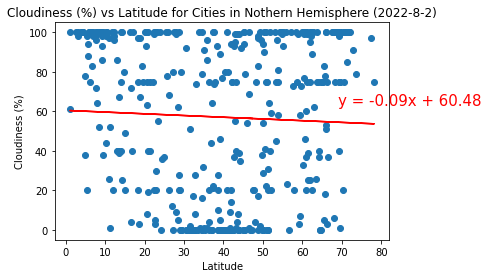

In [23]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Cloudiness (%) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(69,63),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_cloud_v_lat.png')
plt.show()

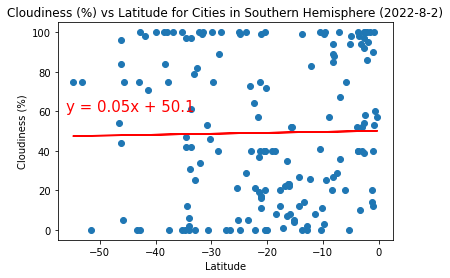

In [32]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Cloudiness (%) vs Latitude for Cities in Southern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-56,60),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_cloud_v_lat.png')
plt.show()

#### Cloudiness versus Latitude
These regressions show very weak correlations between cloudiness and latitude for both hemispheres. The values for each dataset show a wide range of cloudiness levels across all the latitudes without much of a descernable pattern.

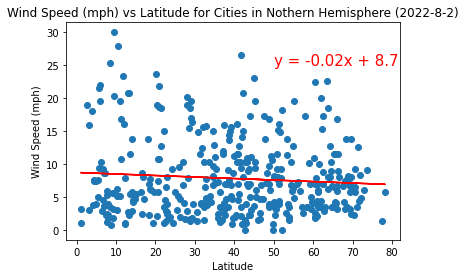

In [33]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Wind Speed (mph) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_wind_v_lat.png')
plt.show()

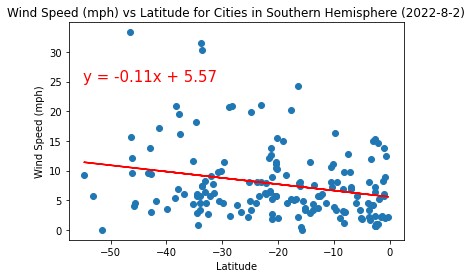

In [34]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Wind Speed (mph) vs Latitude for Cities in Southern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_wind_v_lat.png')
plt.show()

#### Wind Speed versus Latitude
These regressions show a very weak correlation between wind speed and latitude for the northern hemisphere and a stronger correlation for the southern hemisphere. This suggests places in the southern hemisphere that are closer to the equator experience less wind velocity. This is a tenuous connection, however, since there are just more cities in the southern hemisphere closer to the equator than there are near the south pole, which would bias the data in that direction.